In [1]:
# importing packages for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# importing data set
titanic = pd.read_csv("train.csv")

# Displaying the first five rows of the data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Making a copy of the data for reference
data = titanic.copy()

# Displaying the first five rows of the copied data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# DATA CLEANING

In [4]:
# Getting the number of rows and columns in the data
data.shape

(891, 12)

> The data contains 891 rows, and 12 columns

In [5]:
# Getting the basic information of the general data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> From the info above, it's obvious, there are missing values and a sign the data is not clean and will require some preparation and cleaning

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Renaming some columns to enable understand what the column is for
data.rename(columns = {
    "Pclass":"PassengerClass",
    "SibSp":"SiblingSpouse",
    "Parch":"ParentChildren"
}, inplace = True)

# Displaying two random rows
data.sample(n = 2)

,PassengerId,Survived,PassengerClass,Name,Sex,Age,SiblingSpouse,ParentChildren,Ticket,Fare,Cabin,Embarked
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S


> Columns names successfully changed

In [8]:
# Checking for duplicates
data.duplicated().sum()

0

> There are no duplicates in the data set

In [9]:
# Checking for missing values
data.isnull().sum()

PassengerId         0
Survived            0
PassengerClass      0
Name                0
Sex                 0
Age               177
SiblingSpouse       0
ParentChildren      0
Ticket              0
Fare                0
Cabin             687
Embarked            2
dtype: int64

> From the result, it's seen that Age has 177 missing values, Cabin has 687 missing values and Embarked has 2 missing values

In [10]:
# Looking at the Cabin column
data.Cabin.unique().size # Returns the total number of unique values

148

In [11]:
data.Cabin.value_counts().sum() # Returns the total number of non-null values in the column

204

> There are 204 non null values in the column, and 148 unique values. It's hard to see how the Cabin location of the passenger affects their chances of survival. Thus this column will be dropped. 

In [12]:
# Dropping the Cabin column
data.drop("Cabin", axis = 1, inplace = True)

# Displaying first two rows of the data
data.head(2)

,PassengerId,Survived,PassengerClass,Name,Sex,Age,SiblingSpouse,ParentChildren,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


> Cabin column successfully removed

In [13]:
# Looking at the Embarked column
data.Embarked.value_counts() # Returns the count of each unique values

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
# Checking rows with null values in the Embarked column
missing_embarked = data[data["Embarked"].isnull()]

# Returning the values
missing_embarked

,PassengerId,Survived,PassengerClass,Name,Sex,Age,SiblingSpouse,ParentChildren,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


> Somethings interesting here. The two data sets are of same Passenger class, same sex, SiblingSpouse, same ParentChildren, same Ticket and same fare. 

In [15]:
data["Embarked"][(data["Sex"] == "female") & (data["PassengerClass"] == 1) & (data["SiblingSpouse"] == 0) & 
                (data["ParentChildren"] == 0) & (data["Fare"] >= 50.0) & 
                (data["Fare"] <= 100.0)].value_counts()

C    6
S    6
Name: Embarked, dtype: int64

> We've got two missing values and we have two values who almost matched the criteria. We will fill the missing values with each one. 

In [16]:
# Checking the counts in each Embarked category with Age greater than 60 
data["Embarked"][(data["Age"] > 60)].value_counts()

S    16
C     3
Q     2
Name: Embarked, dtype: int64

In [17]:
# Checking the counts in each Embarked category with Age less than 40 
data["Embarked"][(data["Age"] <= 40)].value_counts()

S    441
C     99
Q     23
Name: Embarked, dtype: int64

> Among those who are above 60 age, the likelihood of embarking using "S" is five times higher than the likelihood of using a "C". But this value drops to four times among those age 40 or less. So we will assign "C" to the age 38 and "S" to the age 62

In [18]:
# Assigning "C" to the null value with age 38
data.iloc[61] = data.iloc[61].fillna("C")

In [19]:
# Displaying the value
data.iloc[61]

PassengerId                        62
Survived                            1
PassengerClass                      1
Name              Icard, Miss. Amelie
Sex                            female
Age                              38.0
SiblingSpouse                       0
ParentChildren                      0
Ticket                         113572
Fare                             80.0
Embarked                            C
Name: 61, dtype: object

> The value has been changed. 

In [20]:
# Assigning "S" to the null value with age 62
data.iloc[829] = data.iloc[829].fillna("S")

In [21]:
# Displaying the value
data.iloc[829]

PassengerId                                             830
Survived                                                  1
PassengerClass                                            1
Name              Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                                  female
Age                                                    62.0
SiblingSpouse                                             0
ParentChildren                                            0
Ticket                                               113572
Fare                                                   80.0
Embarked                                                  S
Name: 829, dtype: object

In [22]:
# Checking for nulls in Embarked column
data.Embarked.isnull().sum()

0

> No more missing values in the column

In [23]:
# Looking at the Age column
data.Age.isnull().sum()

177

In [24]:
# Filling the age missing values with the mean of the values. 
mean_age = data["Age"].mean() # Calculates the mean

data["Age"].fillna(mean_age, inplace = True) # Filling the age missing values with the mean of the values.

# Displaying the number of null values in the column Age
data.Age.isnull().sum()

0

> There are no missing values in the columns again.

In [25]:
data.isnull().sum()

PassengerId       0
Survived          0
PassengerClass    0
Name              0
Sex               0
Age               0
SiblingSpouse     0
ParentChildren    0
Ticket            0
Fare              0
Embarked          0
dtype: int64

> There are no missing values in the data again. 

> **Standardizing values in Embarked column**

> In the **Titanic dataset**, the **"Embarked"** column represents **the port of embarkation for each passenger**. It indicates the location where passengers boarded the Titanic. The values for "Embarked" are as follows:

1. **C**: Stands for **Cherbourg**, a port city in France.

2. **Q**: Represents **Queenstown** (now known as Cobh), a port town in Ireland.

3. **S**: Refers to **Southampton**, a major port city in England.

We will replace C, Q and S with these values. 

In [26]:
# Standardizing the values
data["Embarked"].replace({
    "C":"Cherbourg",
    "Q":"Queenstown",
    "S":"Southampton"
}, inplace = True)

# Printing the unique values
data.Embarked.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

> Result above shows that the column has been standardized. 

In [27]:
data.columns

Index(['PassengerId', 'Survived', 'PassengerClass', 'Name', 'Sex', 'Age',
       'SiblingSpouse', 'ParentChildren', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

>**Dropping Unnecessary columns** 

> Values such as PassengerId, Name and Ticket are unlikely to affect the outcome of our analysis and thus will be dropped.

In [28]:
# Deleting unwanted columns
data.drop(columns = ["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)

# Displaying two random rows
data.sample(n=2)

,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChildren,Fare,Embarked
413,0,2,male,29.699118,0,0,0.0,Southampton
253,0,3,male,30.000000,1,0,16.1,Southampton


> Unwanted columns have been successfully deleted. 

In [29]:
# Looking at Age values
data.Age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

> Age values contains decimals. We are going to round them to their nearest 0.5

In [30]:
# Creating a new column rounding age to nearest 0.5
data["RoundedAge"] = np.round(data["Age"] * 2)/2

# Displaying 10 random rows
data.sample(n = 10)

,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChildren,Fare,Embarked,RoundedAge
388,0,3,male,29.699118,0,0,7.7292,Queenstown,29.5
41,0,2,female,27.000000,1,0,21.0000,Southampton,27.0
670,1,2,female,40.000000,1,1,39.0000,Southampton,40.0
273,0,1,male,37.000000,0,1,29.7000,Cherbourg,37.0
233,1,3,female,5.000000,4,2,31.3875,Southampton,5.0
209,1,1,male,40.000000,0,0,31.0000,Cherbourg,40.0
744,1,3,male,31.000000,0,0,7.9250,Southampton,31.0
752,0,3,male,33.000000,0,0,9.5000,Southampton,33.0
781,1,1,female,17.000000,1,0,57.0000,Southampton,17.0
734,0,2,male,23.000000,0,0,13.0000,Southampton,23.0


In [31]:
# Replacing values in Age column with RoundedAge values
data.Age = data.RoundedAge

# Displaying the unique values in Age
data.Age.unique()

array([22. , 38. , 26. , 35. , 29.5, 54. ,  2. , 27. , 14. ,  4. , 58. ,
       20. , 39. , 55. , 31. , 34. , 15. , 28. ,  8. , 19. , 40. , 66. ,
       42. , 21. , 18. ,  3. ,  7. , 49. , 29. , 65. , 28.5,  5. , 11. ,
       45. , 17. , 32. , 16. , 25. ,  1. , 30. , 33. , 23. , 24. , 46. ,
       59. , 71. , 37. , 47. , 14.5, 70.5, 32.5, 12. ,  9. , 36.5, 51. ,
       55.5, 40.5, 44. , 61. , 56. , 50. , 36. , 45.5, 20.5, 62. , 41. ,
       52. , 63. , 23.5, 43. , 60. , 10. , 64. , 13. , 48. , 53. , 57. ,
       80. , 70. , 24.5,  6. ,  0.5, 30.5, 34.5, 74. ])

> No more decimals beyond those of .5

In [32]:
# Removing the RoundedAge column
data.drop("RoundedAge", axis = 1, inplace = True)

# Displaying the first two columns
data.head(2)

,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChildren,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,Southampton
1,1,1,female,38.0,1,0,71.2833,Cherbourg


>**Voila! Our data is now cleaned. Next is Data Wrangling.** 

# Data Wrangling

In [33]:
# Taking the descriptive statistics of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
PassengerClass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Age,891.0,29.660494,13.000197,0.5,22.0000,29.5000,35.0,80.0000
SiblingSpouse,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
ParentChildren,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


> All values seems okay except the minimum and maximum value of 'Fare'. Since everyone got a ticket for the Titanic, that means everyone who boarded the Titanic did pay a fare. And the maximum value seems like an outlier.

In [34]:
# Checking the Fare column
data.Fare.value_counts().sort_index()

0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Fare, Length: 248, dtype: int64

> From the results shown above, it shows that 15 people didn't pay a fare.

In [35]:
data.Embarked.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [36]:
data[data["Fare"] == 0.0]

,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChildren,Fare,Embarked
179,0,3,male,36.0,0,0,0.0,Southampton
263,0,1,male,40.0,0,0,0.0,Southampton
271,1,3,male,25.0,0,0,0.0,Southampton
277,0,2,male,29.5,0,0,0.0,Southampton
302,0,3,male,19.0,0,0,0.0,Southampton
413,0,2,male,29.5,0,0,0.0,Southampton
466,0,2,male,29.5,0,0,0.0,Southampton
481,0,2,male,29.5,0,0,0.0,Southampton
597,0,3,male,49.0,0,0,0.0,Southampton
633,0,1,male,29.5,0,0,0.0,Southampton


> Interestly, all with fare value 0.0 are all male and embarked from Southampton

In [37]:
# Checking all values that are male, with both zero SiblingSpouse and ParentChildren and embarked from Southampton
zero_fare = data[(data["Sex"] == "male") & 
                (data["SiblingSpouse"] == 0.0) &
                (data["ParentChildren"] == 0.0) &
                (data["Embarked"] == "Southampton")]

In [38]:
# Calculating the average fare of all those under this category
average_zero_fare = zero_fare["Fare"].mean()

In [39]:
# Rounding the average value to four decimal places
rounded_zero_fare = round(average_zero_fare, 4)

In [40]:
# Displaying the average rounded fare
rounded_zero_fare

14.3995

In [41]:
# Replacing all 0.0 values in Fare with the calculated avaerage value
data["Fare"].replace(0.0, 14.3995, inplace = True)

# Checking number Fare values that are 0.0
data["Fare"][data["Fare"] == 0.0].value_counts()

Series([], Name: Fare, dtype: int64)

> Results above shows that there is none again. 

In [42]:
# Checking number of those with fare 512.3292 
data.Fare.value_counts().sort_index(ascending = False)

512.3292    3
263.0000    4
262.3750    2
247.5208    2
227.5250    4
           ..
6.4500      1
6.4375      1
6.2375      1
5.0000      1
4.0125      1
Name: Fare, Length: 248, dtype: int64

> Three people paid same amount of fare. It's possible it's valid and will be left that way.

In [43]:
# Back to basic statistic description of our data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0000,0.000,0.0000,1.0,1.0000
PassengerClass,891.0,2.308642,0.836071,1.0000,2.000,3.0000,3.0,3.0000
Age,891.0,29.660494,13.000197,0.5000,22.000,29.5000,35.0,80.0000
SiblingSpouse,891.0,0.523008,1.102743,0.0000,0.000,0.0000,1.0,8.0000
ParentChildren,891.0,0.381594,0.806057,0.0000,0.000,0.0000,0.0,6.0000
Fare,891.0,32.446624,49.570570,4.0125,7.925,14.4542,31.0,512.3292


In [44]:
# Checking our value label
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

> From the above we see that those who didn't survive are more than those who did. 

# Data Visualization

In [45]:
data.columns

Index(['Survived', 'PassengerClass', 'Sex', 'Age', 'SiblingSpouse',
       'ParentChildren', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:>

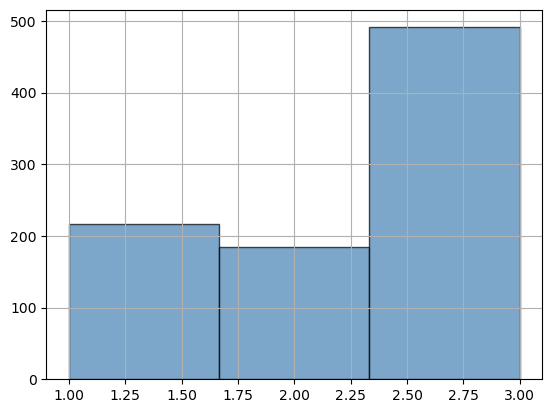

In [46]:
# Visualizing the distribution of PassengerClass
data.PassengerClass.hist(bins = 3,color = "steelblue", edgecolor = "black", alpha = 0.7)

> The distribution shows that there were more passenggers were class 3 passengers. 

<AxesSubplot:>

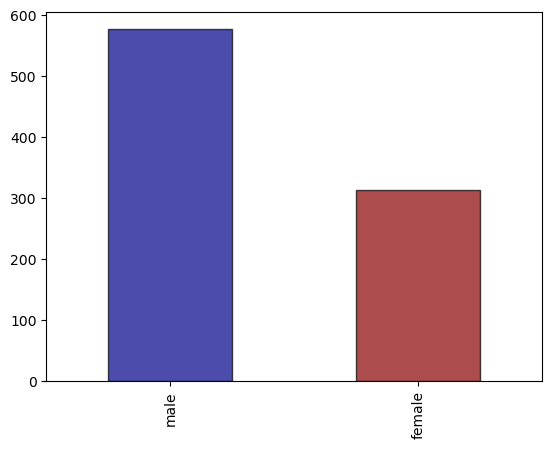

In [47]:
# Visualizing the sex column
data.Sex.value_counts().plot(kind ="bar", color = ["darkblue", "darkred"], edgecolor = "black", alpha = 0.7)

> There are more male passengers than female passengers.

<AxesSubplot:>

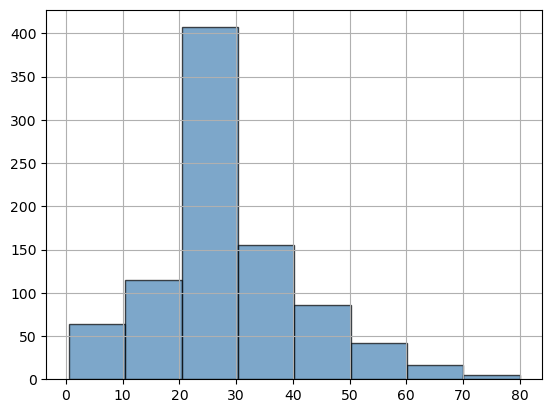

In [49]:
# Checking age distribution
data.Age.hist(bins = 8, color = "steelblue", edgecolor = "black", alpha = 0.7)

> The histogram above shows that majority of the passengers were between, 20 - 30 years, with the least being those between 70 and 80

In [50]:
data.columns

Index(['Survived', 'PassengerClass', 'Sex', 'Age', 'SiblingSpouse',
       'ParentChildren', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:>

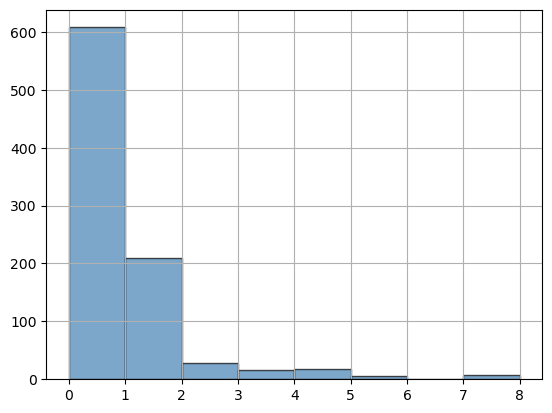

In [51]:
# Checking the SiblingSpouse distribution
data.SiblingSpouse.hist(bins = 8, color = "steelblue", edgecolor = "black", alpha = 0.7)

> The data is not normally distributed. With majority having no or just one siblings/spouse

<AxesSubplot:>

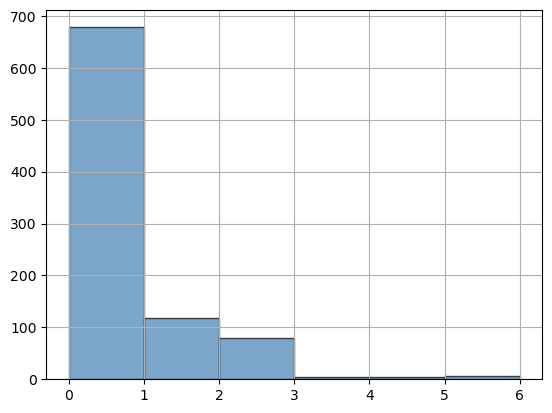

In [52]:
# Checking the ParentChildren distribution
data.ParentChildren.hist(bins = 6, color = "steelblue", edgecolor = "black", alpha = 0.7)

> The data is not normally distributed. With majority having no or just one parent/children

<AxesSubplot:>

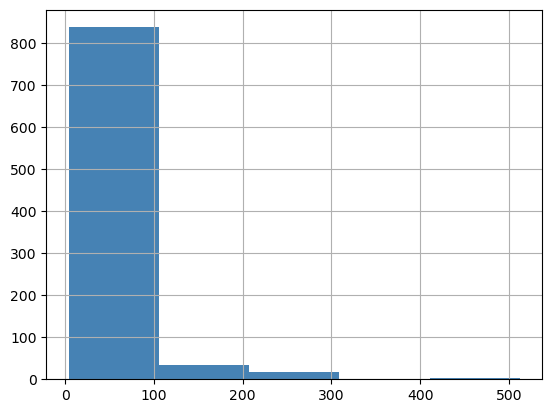

In [53]:
# Checking the distribution of fare
data.Fare.hist(bins = 5, color = "steelblue")

> Most Passengers paid a fare below 100

<AxesSubplot:>

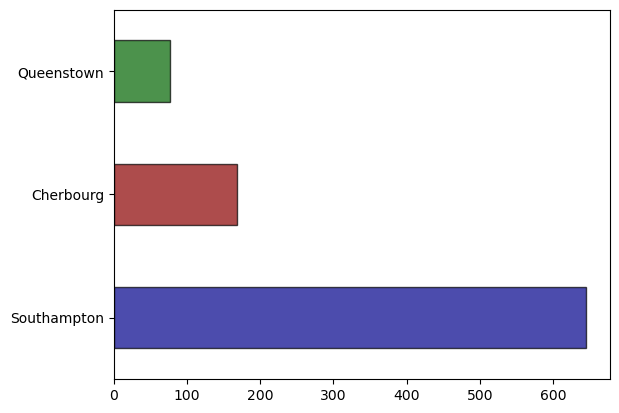

In [54]:
# Checking the distribution of the embarked column
data.Embarked.value_counts().plot(kind = "barh", color = ["darkblue", "darkred", "darkgreen"], edgecolor = "black", alpha = 0.7)

> The graph shows that more passengers took from Southampton and the least were from Queenstown

In [55]:
# Creating a new column to classify fare values
def fare_function(x):
    if x < 50:
        return "Low"
    elif x <= 100:
        return "mid"
    else:
        return "high"

In [56]:
data["FareClassified"] = data["Fare"].apply(fare_function)

data.head()

,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChildren,Fare,Embarked,FareClassified
0,0,3,male,22.0,1,0,7.2500,Southampton,Low
1,1,1,female,38.0,1,0,71.2833,Cherbourg,mid
2,1,3,female,26.0,0,0,7.9250,Southampton,Low
3,1,1,female,35.0,1,0,53.1000,Southampton,mid
4,0,3,male,35.0,0,0,8.0500,Southampton,Low


<AxesSubplot:xlabel='count', ylabel='FareClassified'>

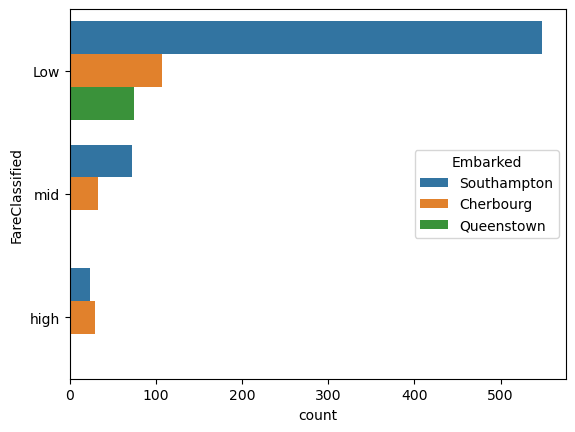

In [57]:
sns.countplot(y = "FareClassified", hue = "Embarked", data = data)

> Graph shows those from Cherbourg port paid higher fee than the other port, with no one from Queenstown port paying a fee above 100. 

In [59]:
# Removing FareClassified column
data.drop("FareClassified", axis = 1, inplace = True)

# Displaying first two items
data.head(2)

,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChildren,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,Southampton
1,1,1,female,38.0,1,0,71.2833,Cherbourg


# Data Preprocessing

> Embark and Age are categorical columns containing strings but need to be transformed numerical values.   

>> From one of the Graph above we see that more people paid higher fare from Cherbourg and Southampton port than from Queenstown. Therefore, the column will be treated as an ordinal values where as the sex column will be treated as norminal  values. 

In [60]:
# Transforming the Sex column (norminal) using pd.get_dummies
dummies = pd.get_dummies(data.Sex)

# Returning the first five rows
dummies.head(5)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [61]:
# Adding the transform column to the original data
data = pd.concat([data, dummies], axis = 1)

data.head()

,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChildren,Fare,Embarked,female,male
0,0,3,male,22.0,1,0,7.2500,Southampton,0,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,1,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1,0
3,1,1,female,35.0,1,0,53.1000,Southampton,1,0
4,0,3,male,35.0,0,0,8.0500,Southampton,0,1


In [62]:
# Removing the original Sex column
data.drop("Sex", axis = 1, inplace = True)

# Displaying five rows of the data
data.head()

,Survived,PassengerClass,Age,SiblingSpouse,ParentChildren,Fare,Embarked,female,male
0,0,3,22.0,1,0,7.2500,Southampton,0,1
1,1,1,38.0,1,0,71.2833,Cherbourg,1,0
2,1,3,26.0,0,0,7.9250,Southampton,1,0
3,1,1,35.0,1,0,53.1000,Southampton,1,0
4,0,3,35.0,0,0,8.0500,Southampton,0,1


In [63]:
# Calling the module to be used to tranform the Embarked column (ordinal) using Label Encoder
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

In [64]:
# Transforming the Embarked column
data["Embarked"] = la.fit_transform(data["Embarked"])

# Displaying five random numbers
data.sample(n = 5)

,Survived,PassengerClass,Age,SiblingSpouse,ParentChildren,Fare,Embarked,female,male
798,0,3,30.0,0,0,7.2292,0,0,1
550,1,1,17.0,0,2,110.8833,0,0,1
715,0,3,19.0,0,0,7.6500,2,0,1
838,1,3,32.0,0,0,56.4958,2,0,1
782,0,1,29.0,0,0,30.0000,2,0,1


>**Running Correlation for feature selection**

In [65]:
# Separating features from label
features_data = data.drop("Survived", axis = 1)

In [66]:
# Displaying first two rows of the data
features_data.head(2)

,PassengerClass,Age,SiblingSpouse,ParentChildren,Fare,Embarked,female,male
0,3,22.0,1,0,7.2500,2,0,1
1,1,38.0,1,0,71.2833,0,1,0


In [67]:
# Taking correlation of the feature sections
features_data.corr().round(2)

,PassengerClass,Age,SiblingSpouse,ParentChildren,Fare,Embarked,female,male
PassengerClass,1.00,-0.33,0.08,0.02,-0.55,0.17,-0.13,0.13
Age,-0.33,1.00,-0.23,-0.18,0.09,-0.03,-0.08,0.08
SiblingSpouse,0.08,-0.23,1.00,0.41,0.16,0.07,0.11,-0.11
ParentChildren,0.02,-0.18,0.41,1.00,0.21,0.04,0.25,-0.25
Fare,-0.55,0.09,0.16,0.21,1.00,-0.22,0.18,-0.18
Embarked,0.17,-0.03,0.07,0.04,-0.22,1.00,-0.11,0.11
female,-0.13,-0.08,0.11,0.25,0.18,-0.11,1.00,-1.00
male,0.13,0.08,-0.11,-0.25,-0.18,0.11,-1.00,1.00


<AxesSubplot:>

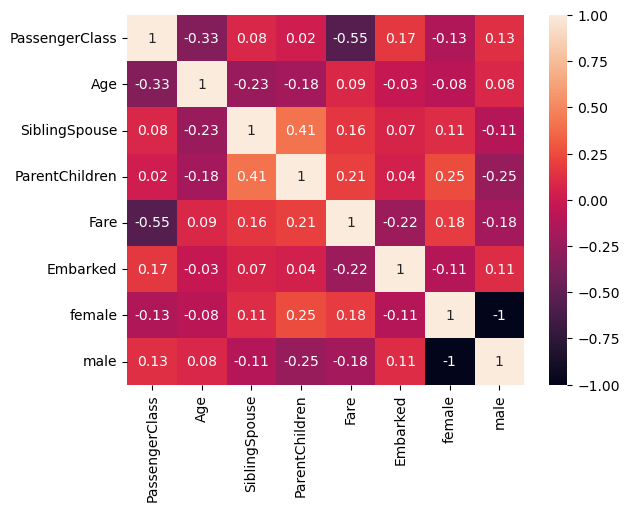

In [68]:
# Visualizing data using heatmap
sns.heatmap(features_data.corr().round(2), annot = True)

> Correlation shows there are no strong negative or positive between any variable

# Data Splitting

In [70]:
# Importing module to split data into training and testing set
from sklearn.model_selection import train_test_split

In [71]:
# Splitting data into features and label
X = features_data # features
y = data.Survived # Label

In [72]:
X.head(2)

,PassengerClass,Age,SiblingSpouse,ParentChildren,Fare,Embarked,female,male
0,3,22.0,1,0,7.2500,2,0,1
1,1,38.0,1,0,71.2833,0,1,0


In [73]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [74]:
# Splitting data set into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle = True, random_state = 42)

In [75]:
print("The shape of X_train data set is:", X_train.shape)
print("The shape of X_test data set is:", X_test.shape)
print("The shape of y_train data set is:", y_train.shape)
print("The shape of y_test data set is:", y_test.shape)

The shape of X_train data set is: (623, 8)
The shape of X_test data set is: (268, 8)
The shape of y_train data set is: (623,)
The shape of y_test data set is: (268,)


# Algorithm selection and model training

In [76]:
# Importing first algorithm (naive_bayes) from sklearn
from sklearn.naive_bayes import GaussianNB

# Creating an object of the algorithm
nb = GaussianNB()

In [77]:
# Training model with data
nb.fit(X_train, y_train)

GaussianNB()

# Model evaluation

In [78]:
# Checking the accuracy score
print("The models accuracy score is:", nb.score(X_train, y_train).round(2)*100)

The models accuracy score is: 80.0


In [79]:
nb.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [80]:
np.array([y_test])

array([[1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 1]], dtype=int64)

In [81]:
# Importing other evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score

In [82]:
# Evaluating using accuracy_score
accuracy_score(y_test, nb.predict(X_test)).round(2)*100

79.0

> Our model had an accuracy score of 79% when tested on unseen data set. 

In [83]:
# Evaluating using confusion_matrix
confusion_matrix(y_test, nb.predict(X_test))

array([[129,  28],
       [ 28,  83]], dtype=int64)

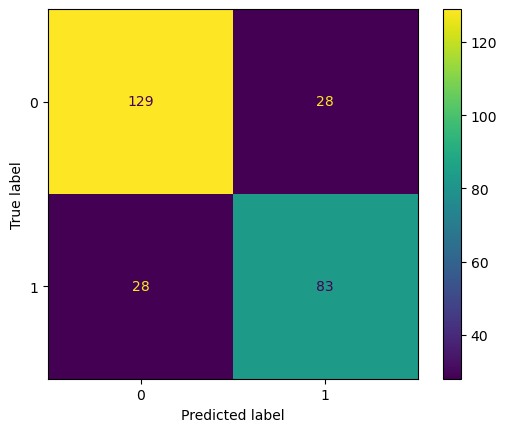

In [84]:
# Displaying the confusion_matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, nb.predict(X_test)), display_labels = [0, 1]).plot()

> The Confusion Matrix Display shows that the model predicted 129 values that are "0" correctly, but wrongly predicted 28 to be "1". While it was able to predict 83 values that were "1" correctly but also predicted 28 wrongly. 

# Testing another model

In [85]:
# importing KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# Creating an object for the algorithm
knn = KNeighborsClassifier()

In [86]:
# training algorithm with the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
# Checking the accuracy score
knn.score(X_train, y_train).round(2)*100

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


80.0

In [88]:
knn.predict(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [89]:
np.array([y_test])

array([[1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 0, 1]], dtype=int64)

In [90]:
# Evaluating using accuracy_score
accuracy_score(y_test, knn.predict(X_test)).round(2)*100

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


72.0

> Naive Baiyes model with an accuracy score of 79 performed better than the KNN model that has 72 accuracy score. 

In [91]:
# Further evaluation using confusion_matrix
confusion_matrix(y_test, knn.predict(X_test))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[133,  24],
       [ 50,  61]], dtype=int64)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


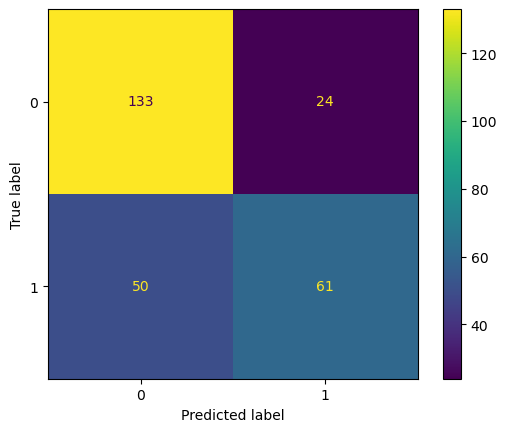

In [92]:
# Displaying the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, knn.predict(X_test)), display_labels = [0,1]).plot()

>  The Confusion Matrix Display shows that the model predicted 133 values that are "0" correctly, but wrongly predicted 24 to be "1". While it was able to predict 61 values that were "1" correctly but also predicted 50 wrongly. 

>>**Overall the naive_bayes model performed better than the KNN model.**

>>NB: Further operations can be carried out to improve the performance of the model.